In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True) # y labels are oh-encoded

import tensorflow as tf
import matplotlib.pyplot as  plt


c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\aarohi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\aarohi\

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
print(mnist.train.images.shape, mnist.train.labels.shape)

print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


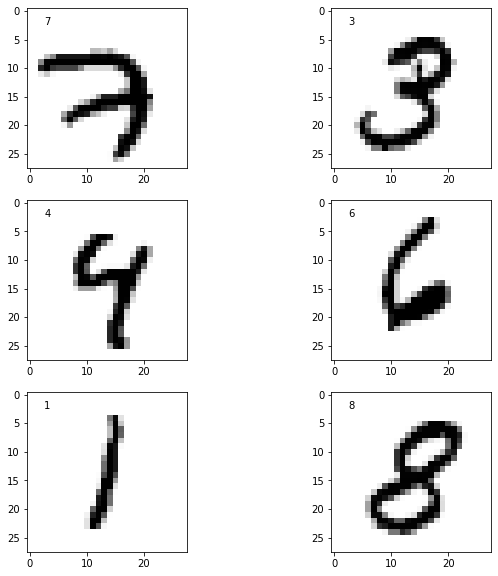

In [3]:
import numpy as np
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])

    label = np.argmax(mnist.train.labels[i,:])
    #label=mnist.train.labels[i,:]
    ax.imshow(im, cmap='Greys')
    #ax.imshow(im)
    ax.text(left, top, label)

In [4]:
# hyper Parameters
learning_rate = 0.001
training_epochs = 15  # means we are feeding 60000 images 15 times.
batch_size = 100      ## it means we giving 100 images as input and getting 100 outputs and based on that we are  updating  the weights.
display_step = 1      # this is not a part of training process. This is just to  display to the user 

Why we use batches ?

Because if we update our weights based on 55000 input sample then the training is going to be very slow.
There might me memory constraints means you might not be able to fit the all data in shot. Remember we make use of GPU’s for training the neural networks. GPU have their own memory ie the Graphic memory. And if we together give 55000 samples to GPU for training then maybe GPU end this task with errors. So that’s why we use batches for training.
So in this example we have a batch size of 100 which means that after every 100 images which fed to the network, we update the weights once that means instead of updating the weights after 55000 samples we are updating after every 100 samples. Because of this we speed up the training process. Also with 100 images GPU memory constraint will also get resolved.
Sometime 100 batch size will also be a problem because may be your pc don’t have sufficient memory to accommodate 100 images. Then you have to choose batch size accordingly.


In [5]:
# Network Parameters
n_hidden_1 = 256 # 1st layer has 256 neurons
n_hidden_2 = 256 # 2nd layer has 256 neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [6]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


In [5]:

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),  # n_input 784 and n_hidden_1 256
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),  # output of h1 will be a input for h2 and n_hidden_2 256
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))  # 256,10
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [6]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])  #matmul on x and w , then adding it with bias # summation
    layer_1 = tf.nn.relu(layer_1)   # activation function
    
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer


In [7]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)


In [8]:

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))   #. pred is the output of MLP . Y is the placeholder which will hold the target output

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#It is used to reduce the cost or error. 
#Earlier we have used Stocastic Gradient Descent Optimizer. In Stocastic gradient descent optimizer we need to 
#manually update the weights but AdamOptimizer do this for us. It is very easy to use it. We just assign 1 initial
#weight and after that it will gtake care of weight updation



# Initializing the variables
init = tf.global_variables_initializer()
#create an empty list to store the cost history and accuracy history
cost_history = []
accuracy_history = []
# Launch the graph


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # Run optimization op (backprop) and cost op (to get loss value)
            a, c = sess.run([optimizer, cost], feed_dict={x: batch_x,y: batch_y})  
            #a is the variable we use to hold what gets returned by running the optimizer in the Session. We don’t need to save that output since the optimiser alters the model’s weights and biases directly, so we save the optimiser’s returned value to _
            #  c is the variable we save the cost
        
        # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        #if epoch % display_step == 0:

            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
            # Calculate accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            
            acu_temp = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})
            #append the accuracy to the list
            
            accuracy_history.append(acu_temp)
            #append the cost history
            cost_history.append(avg_cost)
            print("Epoch:", '%04d' % (epoch + 1), "- cost=", "{:.9f}".format(avg_cost), "- Accuracy=",acu_temp)


    print("Optimization Finished!")
    #plot the cost history
    plt.plot(cost_history)
    plt.show()
    #plot the accuracy history
    plt.plot(accuracy_history)
    plt.show()
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 - cost= 3.685782138 - Accuracy= 0.1158
Epoch: 0001 - cost= 6.799270241 - Accuracy= 0.124
Epoch: 0001 - cost= 9.650791016 - Accuracy= 0.1319
Epoch: 0001 - cost= 12.306396040 - Accuracy= 0.1416
Epoch: 0001 - cost= 14.858946866 - Accuracy= 0.1518
Epoch: 0001 - cost= 17.242998491 - Accuracy= 0.1618
Epoch: 0001 - cost= 19.247243208 - Accuracy= 0.1714
Epoch: 0001 - cost= 21.277549938 - Accuracy= 0.1815
Epoch: 0001 - cost= 23.193328081 - Accuracy= 0.1885
Epoch: 0001 - cost= 25.012308350 - Accuracy= 0.1985
Epoch: 0001 - cost= 26.356812633 - Accuracy= 0.2085
Epoch: 0001 - cost= 27.921342551 - Accuracy= 0.2199
Epoch: 0001 - cost= 29.342369940 - Accuracy= 0.2314
Epoch: 0001 - cost= 30.721320468 - Accuracy= 0.24
Epoch: 0001 - cost= 32.182550604 - Accuracy= 0.2511
Epoch: 0001 - cost= 33.519562655 - Accuracy= 0.2589
Epoch: 0001 - cost= 34.600226718 - Accuracy= 0.2652
Epoch: 0001 - cost= 35.913869296 - Accuracy= 0.2759
Epoch: 0001 - cost= 37.136039928 - Accuracy= 0.2854
Epoch: 0001 - cost

Epoch: 0001 - cost= 106.112990778 - Accuracy= 0.7417
Epoch: 0001 - cost= 106.342233138 - Accuracy= 0.7422
Epoch: 0001 - cost= 106.524143441 - Accuracy= 0.7424
Epoch: 0001 - cost= 106.804737646 - Accuracy= 0.7427
Epoch: 0001 - cost= 107.043675301 - Accuracy= 0.7429
Epoch: 0001 - cost= 107.192764962 - Accuracy= 0.7445
Epoch: 0001 - cost= 107.379896656 - Accuracy= 0.7446
Epoch: 0001 - cost= 107.531935522 - Accuracy= 0.7467
Epoch: 0001 - cost= 107.759492271 - Accuracy= 0.7473
Epoch: 0001 - cost= 108.054291992 - Accuracy= 0.748
Epoch: 0001 - cost= 108.255035428 - Accuracy= 0.7489
Epoch: 0001 - cost= 108.516594904 - Accuracy= 0.7491
Epoch: 0001 - cost= 108.818973416 - Accuracy= 0.7488
Epoch: 0001 - cost= 109.089803800 - Accuracy= 0.7507
Epoch: 0001 - cost= 109.317731753 - Accuracy= 0.7522
Epoch: 0001 - cost= 109.592963687 - Accuracy= 0.7534
Epoch: 0001 - cost= 109.865886688 - Accuracy= 0.7542
Epoch: 0001 - cost= 110.035154669 - Accuracy= 0.7549
Epoch: 0001 - cost= 110.292210222 - Accuracy= 0

Epoch: 0001 - cost= 138.215870285 - Accuracy= 0.8157
Epoch: 0001 - cost= 138.401224872 - Accuracy= 0.8154
Epoch: 0001 - cost= 138.575970036 - Accuracy= 0.817
Epoch: 0001 - cost= 138.758565542 - Accuracy= 0.8178
Epoch: 0001 - cost= 138.935612661 - Accuracy= 0.8189
Epoch: 0001 - cost= 139.073319778 - Accuracy= 0.82
Epoch: 0001 - cost= 139.238404187 - Accuracy= 0.8196
Epoch: 0001 - cost= 139.364040548 - Accuracy= 0.8193
Epoch: 0001 - cost= 139.504292124 - Accuracy= 0.8202
Epoch: 0001 - cost= 139.726501832 - Accuracy= 0.8201
Epoch: 0001 - cost= 139.835923732 - Accuracy= 0.8204
Epoch: 0001 - cost= 139.929607773 - Accuracy= 0.8212
Epoch: 0001 - cost= 140.107594806 - Accuracy= 0.8215
Epoch: 0001 - cost= 140.300928421 - Accuracy= 0.8218
Epoch: 0001 - cost= 140.417930013 - Accuracy= 0.8227
Epoch: 0001 - cost= 140.542413795 - Accuracy= 0.8234
Epoch: 0001 - cost= 140.734073244 - Accuracy= 0.8247
Epoch: 0001 - cost= 140.822144748 - Accuracy= 0.8248
Epoch: 0001 - cost= 140.994258076 - Accuracy= 0.8

Epoch: 0001 - cost= 160.693362451 - Accuracy= 0.8509
Epoch: 0001 - cost= 160.798680507 - Accuracy= 0.8514
Epoch: 0001 - cost= 160.977229465 - Accuracy= 0.8523
Epoch: 0001 - cost= 161.176546399 - Accuracy= 0.8526
Epoch: 0001 - cost= 161.314728231 - Accuracy= 0.8528
Epoch: 0001 - cost= 161.418298399 - Accuracy= 0.8531
Epoch: 0001 - cost= 161.549036633 - Accuracy= 0.8536
Epoch: 0001 - cost= 161.687170677 - Accuracy= 0.8536
Epoch: 0001 - cost= 161.768896002 - Accuracy= 0.8547
Epoch: 0001 - cost= 161.821393769 - Accuracy= 0.8545
Epoch: 0001 - cost= 161.971561102 - Accuracy= 0.8545
Epoch: 0001 - cost= 162.062009843 - Accuracy= 0.8543
Epoch: 0001 - cost= 162.198572620 - Accuracy= 0.8538
Epoch: 0001 - cost= 162.433109918 - Accuracy= 0.8545
Epoch: 0001 - cost= 162.669334367 - Accuracy= 0.8548
Epoch: 0001 - cost= 162.762014455 - Accuracy= 0.8541
Epoch: 0001 - cost= 162.896455650 - Accuracy= 0.8536
Epoch: 0001 - cost= 163.095061635 - Accuracy= 0.8539
Epoch: 0001 - cost= 163.211679192 - Accuracy= 

Epoch: 0002 - cost= 8.178880636 - Accuracy= 0.8622
Epoch: 0002 - cost= 8.263800472 - Accuracy= 0.8628
Epoch: 0002 - cost= 8.382166519 - Accuracy= 0.8634
Epoch: 0002 - cost= 8.454376741 - Accuracy= 0.8641
Epoch: 0002 - cost= 8.527559017 - Accuracy= 0.8655
Epoch: 0002 - cost= 8.592317734 - Accuracy= 0.8663
Epoch: 0002 - cost= 8.665158761 - Accuracy= 0.8666
Epoch: 0002 - cost= 8.747025771 - Accuracy= 0.8675
Epoch: 0002 - cost= 8.781396051 - Accuracy= 0.8674
Epoch: 0002 - cost= 8.853758091 - Accuracy= 0.8683
Epoch: 0002 - cost= 8.950798385 - Accuracy= 0.868
Epoch: 0002 - cost= 8.997031004 - Accuracy= 0.8682
Epoch: 0002 - cost= 9.070911466 - Accuracy= 0.8693
Epoch: 0002 - cost= 9.140538743 - Accuracy= 0.8697
Epoch: 0002 - cost= 9.254263913 - Accuracy= 0.8708
Epoch: 0002 - cost= 9.386029882 - Accuracy= 0.8718
Epoch: 0002 - cost= 9.500498633 - Accuracy= 0.8715
Epoch: 0002 - cost= 9.631936080 - Accuracy= 0.8723
Epoch: 0002 - cost= 9.714043999 - Accuracy= 0.8721
Epoch: 0002 - cost= 9.798387573 

Epoch: 0002 - cost= 22.342686192 - Accuracy= 0.881
Epoch: 0002 - cost= 22.484541439 - Accuracy= 0.881
Epoch: 0002 - cost= 22.504476067 - Accuracy= 0.8811
Epoch: 0002 - cost= 22.550918459 - Accuracy= 0.8806
Epoch: 0002 - cost= 22.653797675 - Accuracy= 0.8806
Epoch: 0002 - cost= 22.715466529 - Accuracy= 0.881
Epoch: 0002 - cost= 22.794144431 - Accuracy= 0.8809
Epoch: 0002 - cost= 22.851803771 - Accuracy= 0.8812
Epoch: 0002 - cost= 22.946779607 - Accuracy= 0.8813
Epoch: 0002 - cost= 23.049610285 - Accuracy= 0.8814
Epoch: 0002 - cost= 23.112106311 - Accuracy= 0.8817
Epoch: 0002 - cost= 23.205672290 - Accuracy= 0.8814
Epoch: 0002 - cost= 23.278063703 - Accuracy= 0.8822
Epoch: 0002 - cost= 23.331139323 - Accuracy= 0.882
Epoch: 0002 - cost= 23.430671711 - Accuracy= 0.8821
Epoch: 0002 - cost= 23.488203144 - Accuracy= 0.8821
Epoch: 0002 - cost= 23.571401775 - Accuracy= 0.8816
Epoch: 0002 - cost= 23.651882510 - Accuracy= 0.8818
Epoch: 0002 - cost= 23.663411392 - Accuracy= 0.8815
Epoch: 0002 - co

Epoch: 0002 - cost= 34.668760200 - Accuracy= 0.8895
Epoch: 0002 - cost= 34.715967234 - Accuracy= 0.8898
Epoch: 0002 - cost= 34.785108588 - Accuracy= 0.89
Epoch: 0002 - cost= 34.826222295 - Accuracy= 0.8901
Epoch: 0002 - cost= 34.897004204 - Accuracy= 0.8902
Epoch: 0002 - cost= 34.973465726 - Accuracy= 0.8902
Epoch: 0002 - cost= 35.117345620 - Accuracy= 0.8897
Epoch: 0002 - cost= 35.215534200 - Accuracy= 0.89
Epoch: 0002 - cost= 35.275991194 - Accuracy= 0.8898
Epoch: 0002 - cost= 35.315787874 - Accuracy= 0.89
Epoch: 0002 - cost= 35.368557539 - Accuracy= 0.8906
Epoch: 0002 - cost= 35.426941244 - Accuracy= 0.8907
Epoch: 0002 - cost= 35.489259110 - Accuracy= 0.8906
Epoch: 0002 - cost= 35.543658059 - Accuracy= 0.891
Epoch: 0002 - cost= 35.635479279 - Accuracy= 0.8906
Epoch: 0002 - cost= 35.678756458 - Accuracy= 0.8904
Epoch: 0002 - cost= 35.750615630 - Accuracy= 0.8906
Epoch: 0002 - cost= 35.821035725 - Accuracy= 0.8904
Epoch: 0002 - cost= 35.950577559 - Accuracy= 0.8904
Epoch: 0002 - cost=

Epoch: 0003 - cost= 0.307746013 - Accuracy= 0.8944
Epoch: 0003 - cost= 0.386208836 - Accuracy= 0.8949
Epoch: 0003 - cost= 0.440549968 - Accuracy= 0.8938
Epoch: 0003 - cost= 0.479465308 - Accuracy= 0.8943
Epoch: 0003 - cost= 0.554409003 - Accuracy= 0.8942
Epoch: 0003 - cost= 0.609585540 - Accuracy= 0.8947
Epoch: 0003 - cost= 0.624390233 - Accuracy= 0.8943
Epoch: 0003 - cost= 0.671197345 - Accuracy= 0.8922
Epoch: 0003 - cost= 0.752636505 - Accuracy= 0.8928
Epoch: 0003 - cost= 0.808572077 - Accuracy= 0.8923
Epoch: 0003 - cost= 0.892863064 - Accuracy= 0.8914
Epoch: 0003 - cost= 0.965739651 - Accuracy= 0.8909
Epoch: 0003 - cost= 1.035886655 - Accuracy= 0.8905
Epoch: 0003 - cost= 1.078509631 - Accuracy= 0.8897
Epoch: 0003 - cost= 1.163665437 - Accuracy= 0.8889
Epoch: 0003 - cost= 1.263790975 - Accuracy= 0.8895
Epoch: 0003 - cost= 1.312826609 - Accuracy= 0.89
Epoch: 0003 - cost= 1.378259272 - Accuracy= 0.8916
Epoch: 0003 - cost= 1.435655554 - Accuracy= 0.8918
Epoch: 0003 - cost= 1.479133337 -

Epoch: 0003 - cost= 9.407830255 - Accuracy= 0.8984
Epoch: 0003 - cost= 9.457906015 - Accuracy= 0.8985
Epoch: 0003 - cost= 9.544093704 - Accuracy= 0.898
Epoch: 0003 - cost= 9.626387599 - Accuracy= 0.8983
Epoch: 0003 - cost= 9.698125430 - Accuracy= 0.8989
Epoch: 0003 - cost= 9.746571960 - Accuracy= 0.8995
Epoch: 0003 - cost= 9.832666293 - Accuracy= 0.8998
Epoch: 0003 - cost= 9.919454796 - Accuracy= 0.9
Epoch: 0003 - cost= 9.937874423 - Accuracy= 0.9005
Epoch: 0003 - cost= 10.008145349 - Accuracy= 0.9003
Epoch: 0003 - cost= 10.070942972 - Accuracy= 0.8996
Epoch: 0003 - cost= 10.097462733 - Accuracy= 0.8989
Epoch: 0003 - cost= 10.121591736 - Accuracy= 0.8994
Epoch: 0003 - cost= 10.192614123 - Accuracy= 0.899
Epoch: 0003 - cost= 10.232835039 - Accuracy= 0.8994
Epoch: 0003 - cost= 10.273134274 - Accuracy= 0.8991
Epoch: 0003 - cost= 10.350182635 - Accuracy= 0.8993
Epoch: 0003 - cost= 10.425397569 - Accuracy= 0.8993
Epoch: 0003 - cost= 10.448949865 - Accuracy= 0.8993
Epoch: 0003 - cost= 10.515

Epoch: 0003 - cost= 17.936880545 - Accuracy= 0.9051
Epoch: 0003 - cost= 17.965388967 - Accuracy= 0.905
Epoch: 0003 - cost= 18.015755400 - Accuracy= 0.9048
Epoch: 0003 - cost= 18.089864460 - Accuracy= 0.9055
Epoch: 0003 - cost= 18.139739914 - Accuracy= 0.9053
Epoch: 0003 - cost= 18.206528521 - Accuracy= 0.9058
Epoch: 0003 - cost= 18.217936000 - Accuracy= 0.9056
Epoch: 0003 - cost= 18.248768024 - Accuracy= 0.9054
Epoch: 0003 - cost= 18.318658071 - Accuracy= 0.9061
Epoch: 0003 - cost= 18.380530053 - Accuracy= 0.906
Epoch: 0003 - cost= 18.414931267 - Accuracy= 0.9052
Epoch: 0003 - cost= 18.505628566 - Accuracy= 0.9053
Epoch: 0003 - cost= 18.592222513 - Accuracy= 0.9059
Epoch: 0003 - cost= 18.652893338 - Accuracy= 0.9062
Epoch: 0003 - cost= 18.709778922 - Accuracy= 0.9067
Epoch: 0003 - cost= 18.759547641 - Accuracy= 0.9074
Epoch: 0003 - cost= 18.832062601 - Accuracy= 0.9071
Epoch: 0003 - cost= 18.848630643 - Accuracy= 0.9074
Epoch: 0003 - cost= 18.902179879 - Accuracy= 0.9073
Epoch: 0003 - 

Epoch: 0003 - cost= 25.532532431 - Accuracy= 0.9068
Epoch: 0003 - cost= 25.581549380 - Accuracy= 0.907
Epoch: 0003 - cost= 25.646978950 - Accuracy= 0.9073
Epoch: 0003 - cost= 25.688639911 - Accuracy= 0.9069
Epoch: 0003 - cost= 25.765409937 - Accuracy= 0.907
Epoch: 0003 - cost= 25.792131430 - Accuracy= 0.9066
Epoch: 0003 - cost= 25.840402585 - Accuracy= 0.9066
Epoch: 0003 - cost= 25.854127183 - Accuracy= 0.907
Epoch: 0003 - cost= 25.874275030 - Accuracy= 0.9068
Epoch: 0003 - cost= 25.946136693 - Accuracy= 0.9073
Epoch: 0003 - cost= 26.012451480 - Accuracy= 0.9083
Epoch: 0003 - cost= 26.028167944 - Accuracy= 0.9083
Epoch: 0003 - cost= 26.056845541 - Accuracy= 0.9087
Epoch: 0003 - cost= 26.103412116 - Accuracy= 0.9091
Epoch: 0003 - cost= 26.163091855 - Accuracy= 0.9102
Epoch: 0003 - cost= 26.194873326 - Accuracy= 0.9101
Epoch: 0003 - cost= 26.212768514 - Accuracy= 0.9114
Epoch: 0003 - cost= 26.258639715 - Accuracy= 0.9119
Epoch: 0003 - cost= 26.262618054 - Accuracy= 0.9116
Epoch: 0003 - c

Epoch: 0004 - cost= 3.472528522 - Accuracy= 0.9117
Epoch: 0004 - cost= 3.510077257 - Accuracy= 0.9112
Epoch: 0004 - cost= 3.543311666 - Accuracy= 0.9109
Epoch: 0004 - cost= 3.570191706 - Accuracy= 0.9115
Epoch: 0004 - cost= 3.594593728 - Accuracy= 0.9117
Epoch: 0004 - cost= 3.627121031 - Accuracy= 0.9117
Epoch: 0004 - cost= 3.651313321 - Accuracy= 0.9117
Epoch: 0004 - cost= 3.670481695 - Accuracy= 0.9115
Epoch: 0004 - cost= 3.704259292 - Accuracy= 0.9111
Epoch: 0004 - cost= 3.735982925 - Accuracy= 0.9108
Epoch: 0004 - cost= 3.766403721 - Accuracy= 0.9109
Epoch: 0004 - cost= 3.810055135 - Accuracy= 0.9105
Epoch: 0004 - cost= 3.843048937 - Accuracy= 0.9109
Epoch: 0004 - cost= 3.976470721 - Accuracy= 0.9113
Epoch: 0004 - cost= 4.003134485 - Accuracy= 0.9112
Epoch: 0004 - cost= 4.030337437 - Accuracy= 0.9103
Epoch: 0004 - cost= 4.050327274 - Accuracy= 0.9112
Epoch: 0004 - cost= 4.124966494 - Accuracy= 0.9112
Epoch: 0004 - cost= 4.171435471 - Accuracy= 0.9111
Epoch: 0004 - cost= 4.179138183

Epoch: 0004 - cost= 9.476338429 - Accuracy= 0.9102
Epoch: 0004 - cost= 9.550481925 - Accuracy= 0.9106
Epoch: 0004 - cost= 9.598180886 - Accuracy= 0.9113
Epoch: 0004 - cost= 9.646631526 - Accuracy= 0.9115
Epoch: 0004 - cost= 9.657157959 - Accuracy= 0.9113
Epoch: 0004 - cost= 9.663151980 - Accuracy= 0.9113
Epoch: 0004 - cost= 9.716873296 - Accuracy= 0.9121
Epoch: 0004 - cost= 9.765631751 - Accuracy= 0.9127
Epoch: 0004 - cost= 9.790534858 - Accuracy= 0.9136
Epoch: 0004 - cost= 9.837660293 - Accuracy= 0.9139
Epoch: 0004 - cost= 9.868902587 - Accuracy= 0.9153
Epoch: 0004 - cost= 9.900205500 - Accuracy= 0.9153
Epoch: 0004 - cost= 9.996247939 - Accuracy= 0.9164
Epoch: 0004 - cost= 10.027598998 - Accuracy= 0.9163
Epoch: 0004 - cost= 10.051749173 - Accuracy= 0.9163
Epoch: 0004 - cost= 10.124616431 - Accuracy= 0.9162
Epoch: 0004 - cost= 10.171379695 - Accuracy= 0.9153
Epoch: 0004 - cost= 10.210650977 - Accuracy= 0.915
Epoch: 0004 - cost= 10.259556464 - Accuracy= 0.9139
Epoch: 0004 - cost= 10.297

Epoch: 0004 - cost= 15.223874441 - Accuracy= 0.9167
Epoch: 0004 - cost= 15.265128107 - Accuracy= 0.9169
Epoch: 0004 - cost= 15.282167527 - Accuracy= 0.9176
Epoch: 0004 - cost= 15.319801725 - Accuracy= 0.9178
Epoch: 0004 - cost= 15.376728046 - Accuracy= 0.9181
Epoch: 0004 - cost= 15.411345061 - Accuracy= 0.9181
Epoch: 0004 - cost= 15.438587874 - Accuracy= 0.9185
Epoch: 0004 - cost= 15.456451543 - Accuracy= 0.9185
Epoch: 0004 - cost= 15.526708723 - Accuracy= 0.9184
Epoch: 0004 - cost= 15.560345829 - Accuracy= 0.919
Epoch: 0004 - cost= 15.581009488 - Accuracy= 0.9192
Epoch: 0004 - cost= 15.602755253 - Accuracy= 0.919
Epoch: 0004 - cost= 15.623944462 - Accuracy= 0.9188
Epoch: 0004 - cost= 15.672428078 - Accuracy= 0.9195
Epoch: 0004 - cost= 15.693160529 - Accuracy= 0.9185
Epoch: 0004 - cost= 15.711978596 - Accuracy= 0.9186
Epoch: 0004 - cost= 15.755964535 - Accuracy= 0.918
Epoch: 0004 - cost= 15.770082557 - Accuracy= 0.9179
Epoch: 0004 - cost= 15.786725835 - Accuracy= 0.9177
Epoch: 0004 - c

Epoch: 0005 - cost= 0.573273419 - Accuracy= 0.9188
Epoch: 0005 - cost= 0.588120744 - Accuracy= 0.9186
Epoch: 0005 - cost= 0.621247239 - Accuracy= 0.9185
Epoch: 0005 - cost= 0.633447516 - Accuracy= 0.919
Epoch: 0005 - cost= 0.649869145 - Accuracy= 0.9186
Epoch: 0005 - cost= 0.660134428 - Accuracy= 0.9172
Epoch: 0005 - cost= 0.667267593 - Accuracy= 0.9174
Epoch: 0005 - cost= 0.669655435 - Accuracy= 0.9177
Epoch: 0005 - cost= 0.693377041 - Accuracy= 0.9173
Epoch: 0005 - cost= 0.730838856 - Accuracy= 0.9175
Epoch: 0005 - cost= 0.744930168 - Accuracy= 0.9178
Epoch: 0005 - cost= 0.780207171 - Accuracy= 0.9178
Epoch: 0005 - cost= 0.791598637 - Accuracy= 0.9182
Epoch: 0005 - cost= 0.799229301 - Accuracy= 0.918
Epoch: 0005 - cost= 0.804280414 - Accuracy= 0.9186
Epoch: 0005 - cost= 0.856323663 - Accuracy= 0.9191
Epoch: 0005 - cost= 0.881609321 - Accuracy= 0.9185
Epoch: 0005 - cost= 0.893335690 - Accuracy= 0.9186
Epoch: 0005 - cost= 0.900717323 - Accuracy= 0.9189
Epoch: 0005 - cost= 0.920477756 -

Epoch: 0005 - cost= 4.927543044 - Accuracy= 0.9206
Epoch: 0005 - cost= 4.953882013 - Accuracy= 0.9208
Epoch: 0005 - cost= 4.986485437 - Accuracy= 0.92
Epoch: 0005 - cost= 5.000085901 - Accuracy= 0.9203
Epoch: 0005 - cost= 5.036564065 - Accuracy= 0.9195
Epoch: 0005 - cost= 5.080287373 - Accuracy= 0.9198
Epoch: 0005 - cost= 5.112646139 - Accuracy= 0.9203
Epoch: 0005 - cost= 5.137284686 - Accuracy= 0.9203
Epoch: 0005 - cost= 5.152130867 - Accuracy= 0.9203
Epoch: 0005 - cost= 5.189587577 - Accuracy= 0.9209
Epoch: 0005 - cost= 5.219024670 - Accuracy= 0.9204
Epoch: 0005 - cost= 5.236653300 - Accuracy= 0.9201
Epoch: 0005 - cost= 5.255927975 - Accuracy= 0.9201
Epoch: 0005 - cost= 5.270485885 - Accuracy= 0.92
Epoch: 0005 - cost= 5.282069656 - Accuracy= 0.9199
Epoch: 0005 - cost= 5.309109777 - Accuracy= 0.9188
Epoch: 0005 - cost= 5.323779681 - Accuracy= 0.9185
Epoch: 0005 - cost= 5.345211683 - Accuracy= 0.9185
Epoch: 0005 - cost= 5.366827721 - Accuracy= 0.9187
Epoch: 0005 - cost= 5.393706699 - A

Epoch: 0005 - cost= 9.003917566 - Accuracy= 0.9246
Epoch: 0005 - cost= 9.043167975 - Accuracy= 0.9244
Epoch: 0005 - cost= 9.088422592 - Accuracy= 0.924
Epoch: 0005 - cost= 9.106860227 - Accuracy= 0.9246
Epoch: 0005 - cost= 9.158255886 - Accuracy= 0.925
Epoch: 0005 - cost= 9.180025427 - Accuracy= 0.9244
Epoch: 0005 - cost= 9.206112806 - Accuracy= 0.9235
Epoch: 0005 - cost= 9.224134326 - Accuracy= 0.9231
Epoch: 0005 - cost= 9.284214649 - Accuracy= 0.9223
Epoch: 0005 - cost= 9.303387966 - Accuracy= 0.9222
Epoch: 0005 - cost= 9.311548043 - Accuracy= 0.922
Epoch: 0005 - cost= 9.348659349 - Accuracy= 0.9218
Epoch: 0005 - cost= 9.393671972 - Accuracy= 0.9222
Epoch: 0005 - cost= 9.423533315 - Accuracy= 0.9216
Epoch: 0005 - cost= 9.476638167 - Accuracy= 0.922
Epoch: 0005 - cost= 9.482011443 - Accuracy= 0.9217
Epoch: 0005 - cost= 9.540494082 - Accuracy= 0.922
Epoch: 0005 - cost= 9.612820929 - Accuracy= 0.9225
Epoch: 0005 - cost= 9.653853491 - Accuracy= 0.9226
Epoch: 0005 - cost= 9.674135989 - Ac

Epoch: 0005 - cost= 13.152336220 - Accuracy= 0.9248
Epoch: 0005 - cost= 13.174357195 - Accuracy= 0.9246
Epoch: 0005 - cost= 13.186887831 - Accuracy= 0.9247
Epoch: 0005 - cost= 13.201469810 - Accuracy= 0.9258
Epoch: 0005 - cost= 13.221845154 - Accuracy= 0.9257
Epoch: 0005 - cost= 13.258244929 - Accuracy= 0.9255
Epoch: 0005 - cost= 13.276346956 - Accuracy= 0.925
Epoch: 0005 - cost= 13.307267227 - Accuracy= 0.9252
Epoch: 0005 - cost= 13.318341355 - Accuracy= 0.9252
Epoch: 0005 - cost= 13.330582589 - Accuracy= 0.9246
Epoch: 0005 - cost= 13.349586157 - Accuracy= 0.9244
Epoch: 0005 - cost= 13.364991795 - Accuracy= 0.9244
Epoch: 0005 - cost= 13.396233396 - Accuracy= 0.9249
Epoch: 0005 - cost= 13.433395147 - Accuracy= 0.9245
Epoch: 0005 - cost= 13.474122668 - Accuracy= 0.9245
Epoch: 0005 - cost= 13.520697784 - Accuracy= 0.9241
Epoch: 0005 - cost= 13.588180341 - Accuracy= 0.9249
Epoch: 0005 - cost= 13.616230639 - Accuracy= 0.9249
Epoch: 0005 - cost= 13.624667389 - Accuracy= 0.9247
Epoch: 0005 -

Epoch: 0006 - cost= 2.311734135 - Accuracy= 0.9279
Epoch: 0006 - cost= 2.314507413 - Accuracy= 0.9277
Epoch: 0006 - cost= 2.326024735 - Accuracy= 0.9282
Epoch: 0006 - cost= 2.362880634 - Accuracy= 0.9279
Epoch: 0006 - cost= 2.380139054 - Accuracy= 0.9281
Epoch: 0006 - cost= 2.390637254 - Accuracy= 0.9274
Epoch: 0006 - cost= 2.399121152 - Accuracy= 0.9275
Epoch: 0006 - cost= 2.420749472 - Accuracy= 0.9283
Epoch: 0006 - cost= 2.449839591 - Accuracy= 0.9279
Epoch: 0006 - cost= 2.464793951 - Accuracy= 0.9281
Epoch: 0006 - cost= 2.490341572 - Accuracy= 0.9283
Epoch: 0006 - cost= 2.492591093 - Accuracy= 0.9276
Epoch: 0006 - cost= 2.512656907 - Accuracy= 0.9279
Epoch: 0006 - cost= 2.520907425 - Accuracy= 0.9285
Epoch: 0006 - cost= 2.535361397 - Accuracy= 0.9284
Epoch: 0006 - cost= 2.550770172 - Accuracy= 0.9284
Epoch: 0006 - cost= 2.560797273 - Accuracy= 0.9287
Epoch: 0006 - cost= 2.581742850 - Accuracy= 0.9286
Epoch: 0006 - cost= 2.586576780 - Accuracy= 0.928
Epoch: 0006 - cost= 2.613560406 

Epoch: 0006 - cost= 5.457430934 - Accuracy= 0.9275
Epoch: 0006 - cost= 5.460542217 - Accuracy= 0.927
Epoch: 0006 - cost= 5.484510357 - Accuracy= 0.9268
Epoch: 0006 - cost= 5.490527381 - Accuracy= 0.9266
Epoch: 0006 - cost= 5.519771918 - Accuracy= 0.9267
Epoch: 0006 - cost= 5.544842000 - Accuracy= 0.9266
Epoch: 0006 - cost= 5.556904045 - Accuracy= 0.927
Epoch: 0006 - cost= 5.570607834 - Accuracy= 0.9267
Epoch: 0006 - cost= 5.578010369 - Accuracy= 0.9259
Epoch: 0006 - cost= 5.602536594 - Accuracy= 0.9253
Epoch: 0006 - cost= 5.610521666 - Accuracy= 0.9253
Epoch: 0006 - cost= 5.630619702 - Accuracy= 0.9251
Epoch: 0006 - cost= 5.642251752 - Accuracy= 0.9248
Epoch: 0006 - cost= 5.681048690 - Accuracy= 0.925
Epoch: 0006 - cost= 5.694549578 - Accuracy= 0.9248
Epoch: 0006 - cost= 5.732438223 - Accuracy= 0.925
Epoch: 0006 - cost= 5.736262346 - Accuracy= 0.9257
Epoch: 0006 - cost= 5.770218628 - Accuracy= 0.926
Epoch: 0006 - cost= 5.789477881 - Accuracy= 0.9265
Epoch: 0006 - cost= 5.804327086 - Ac

Epoch: 0006 - cost= 8.655929163 - Accuracy= 0.9268
Epoch: 0006 - cost= 8.656619827 - Accuracy= 0.9264
Epoch: 0006 - cost= 8.669172874 - Accuracy= 0.926
Epoch: 0006 - cost= 8.674543556 - Accuracy= 0.9271
Epoch: 0006 - cost= 8.705457117 - Accuracy= 0.927
Epoch: 0006 - cost= 8.705737540 - Accuracy= 0.9269
Epoch: 0006 - cost= 8.747122864 - Accuracy= 0.9262
Epoch: 0006 - cost= 8.763676157 - Accuracy= 0.9257
Epoch: 0006 - cost= 8.789893163 - Accuracy= 0.9261
Epoch: 0006 - cost= 8.795474917 - Accuracy= 0.9255
Epoch: 0006 - cost= 8.819187022 - Accuracy= 0.9258
Epoch: 0006 - cost= 8.844188542 - Accuracy= 0.9261
Epoch: 0006 - cost= 8.888111861 - Accuracy= 0.9266
Epoch: 0006 - cost= 8.903276939 - Accuracy= 0.928
Epoch: 0006 - cost= 8.937929455 - Accuracy= 0.9277
Epoch: 0006 - cost= 8.956039126 - Accuracy= 0.9279
Epoch: 0006 - cost= 8.965683722 - Accuracy= 0.9279
Epoch: 0006 - cost= 8.993135151 - Accuracy= 0.9281
Epoch: 0006 - cost= 9.006745716 - Accuracy= 0.9289
Epoch: 0006 - cost= 9.040429448 - 

Epoch: 0007 - cost= 0.581922440 - Accuracy= 0.9307
Epoch: 0007 - cost= 0.588914011 - Accuracy= 0.931
Epoch: 0007 - cost= 0.599290998 - Accuracy= 0.9313
Epoch: 0007 - cost= 0.609603363 - Accuracy= 0.9316
Epoch: 0007 - cost= 0.618288645 - Accuracy= 0.9319
Epoch: 0007 - cost= 0.627655195 - Accuracy= 0.9326
Epoch: 0007 - cost= 0.630922223 - Accuracy= 0.9325
Epoch: 0007 - cost= 0.643783960 - Accuracy= 0.9324
Epoch: 0007 - cost= 0.646221518 - Accuracy= 0.9324
Epoch: 0007 - cost= 0.665955755 - Accuracy= 0.9316
Epoch: 0007 - cost= 0.675752749 - Accuracy= 0.9318
Epoch: 0007 - cost= 0.693671776 - Accuracy= 0.9328
Epoch: 0007 - cost= 0.700269763 - Accuracy= 0.9324
Epoch: 0007 - cost= 0.710020244 - Accuracy= 0.9321
Epoch: 0007 - cost= 0.726472054 - Accuracy= 0.932
Epoch: 0007 - cost= 0.729322376 - Accuracy= 0.9313
Epoch: 0007 - cost= 0.734448534 - Accuracy= 0.9311
Epoch: 0007 - cost= 0.742762739 - Accuracy= 0.9309
Epoch: 0007 - cost= 0.765754255 - Accuracy= 0.9304
Epoch: 0007 - cost= 0.792036985 -

Epoch: 0007 - cost= 2.957400890 - Accuracy= 0.9313
Epoch: 0007 - cost= 2.972739651 - Accuracy= 0.9314
Epoch: 0007 - cost= 2.986301183 - Accuracy= 0.9318
Epoch: 0007 - cost= 2.998500110 - Accuracy= 0.9319
Epoch: 0007 - cost= 2.999761725 - Accuracy= 0.932
Epoch: 0007 - cost= 3.000826545 - Accuracy= 0.9319
Epoch: 0007 - cost= 3.048416072 - Accuracy= 0.9314
Epoch: 0007 - cost= 3.059814645 - Accuracy= 0.9316
Epoch: 0007 - cost= 3.078695849 - Accuracy= 0.9315
Epoch: 0007 - cost= 3.110250637 - Accuracy= 0.931
Epoch: 0007 - cost= 3.139497286 - Accuracy= 0.9298
Epoch: 0007 - cost= 3.166961948 - Accuracy= 0.9299
Epoch: 0007 - cost= 3.175705481 - Accuracy= 0.9303
Epoch: 0007 - cost= 3.193616341 - Accuracy= 0.9297
Epoch: 0007 - cost= 3.199860011 - Accuracy= 0.9297
Epoch: 0007 - cost= 3.209516283 - Accuracy= 0.9296
Epoch: 0007 - cost= 3.209777629 - Accuracy= 0.9294
Epoch: 0007 - cost= 3.226489371 - Accuracy= 0.9302
Epoch: 0007 - cost= 3.237671559 - Accuracy= 0.9311
Epoch: 0007 - cost= 3.242586247 -

Epoch: 0007 - cost= 5.425218196 - Accuracy= 0.9316
Epoch: 0007 - cost= 5.469581246 - Accuracy= 0.9318
Epoch: 0007 - cost= 5.481698809 - Accuracy= 0.9329
Epoch: 0007 - cost= 5.487169059 - Accuracy= 0.9324
Epoch: 0007 - cost= 5.491296610 - Accuracy= 0.9323
Epoch: 0007 - cost= 5.505400017 - Accuracy= 0.9319
Epoch: 0007 - cost= 5.526874231 - Accuracy= 0.9306
Epoch: 0007 - cost= 5.542188540 - Accuracy= 0.9298
Epoch: 0007 - cost= 5.550307355 - Accuracy= 0.9293
Epoch: 0007 - cost= 5.554509682 - Accuracy= 0.9289
Epoch: 0007 - cost= 5.558260374 - Accuracy= 0.9289
Epoch: 0007 - cost= 5.564761544 - Accuracy= 0.9289
Epoch: 0007 - cost= 5.577852717 - Accuracy= 0.9284
Epoch: 0007 - cost= 5.595054285 - Accuracy= 0.9286
Epoch: 0007 - cost= 5.599493953 - Accuracy= 0.9293
Epoch: 0007 - cost= 5.618856514 - Accuracy= 0.9292
Epoch: 0007 - cost= 5.626163591 - Accuracy= 0.9295
Epoch: 0007 - cost= 5.632388711 - Accuracy= 0.9298
Epoch: 0007 - cost= 5.654694238 - Accuracy= 0.9291
Epoch: 0007 - cost= 5.674121069

Epoch: 0007 - cost= 7.871838265 - Accuracy= 0.9302
Epoch: 0007 - cost= 7.877664046 - Accuracy= 0.9302
Epoch: 0007 - cost= 7.900076836 - Accuracy= 0.9304
Epoch: 0007 - cost= 7.901210981 - Accuracy= 0.9294
Epoch: 0007 - cost= 7.927837933 - Accuracy= 0.9293
Epoch: 0007 - cost= 7.941186814 - Accuracy= 0.9287
Epoch: 0007 - cost= 7.960812552 - Accuracy= 0.9289
Epoch: 0007 - cost= 7.972018301 - Accuracy= 0.9287
Epoch: 0007 - cost= 7.984700712 - Accuracy= 0.929
Epoch: 0007 - cost= 8.006095358 - Accuracy= 0.9291
Epoch: 0007 - cost= 8.030648698 - Accuracy= 0.9294
Epoch: 0007 - cost= 8.038468070 - Accuracy= 0.9297
Epoch: 0007 - cost= 8.054076450 - Accuracy= 0.9302
Epoch: 0007 - cost= 8.055155734 - Accuracy= 0.9315
Epoch: 0007 - cost= 8.070532073 - Accuracy= 0.9329
Epoch: 0007 - cost= 8.081911360 - Accuracy= 0.9348
Epoch: 0007 - cost= 8.099058594 - Accuracy= 0.9344
Epoch: 0008 - cost= 0.001941216 - Accuracy= 0.935
Epoch: 0008 - cost= 0.018064554 - Accuracy= 0.935
Epoch: 0008 - cost= 0.026142375 - 

Epoch: 0008 - cost= 1.469556431 - Accuracy= 0.9346
Epoch: 0008 - cost= 1.470128955 - Accuracy= 0.9342
Epoch: 0008 - cost= 1.483960643 - Accuracy= 0.9346
Epoch: 0008 - cost= 1.486672186 - Accuracy= 0.9353
Epoch: 0008 - cost= 1.492714723 - Accuracy= 0.9359
Epoch: 0008 - cost= 1.504187191 - Accuracy= 0.9357
Epoch: 0008 - cost= 1.507439450 - Accuracy= 0.9356
Epoch: 0008 - cost= 1.510419197 - Accuracy= 0.9362
Epoch: 0008 - cost= 1.512210011 - Accuracy= 0.9362
Epoch: 0008 - cost= 1.518510506 - Accuracy= 0.9364
Epoch: 0008 - cost= 1.518510512 - Accuracy= 0.9363
Epoch: 0008 - cost= 1.545278622 - Accuracy= 0.9364
Epoch: 0008 - cost= 1.548362932 - Accuracy= 0.9365
Epoch: 0008 - cost= 1.554844035 - Accuracy= 0.9371
Epoch: 0008 - cost= 1.576746407 - Accuracy= 0.937
Epoch: 0008 - cost= 1.580184167 - Accuracy= 0.937
Epoch: 0008 - cost= 1.588609084 - Accuracy= 0.937
Epoch: 0008 - cost= 1.617638802 - Accuracy= 0.9371
Epoch: 0008 - cost= 1.640200064 - Accuracy= 0.9373
Epoch: 0008 - cost= 1.649110529 - 

Epoch: 0008 - cost= 3.246735701 - Accuracy= 0.9352
Epoch: 0008 - cost= 3.276147482 - Accuracy= 0.9348
Epoch: 0008 - cost= 3.278229062 - Accuracy= 0.935
Epoch: 0008 - cost= 3.284006242 - Accuracy= 0.9346
Epoch: 0008 - cost= 3.284521773 - Accuracy= 0.9343
Epoch: 0008 - cost= 3.298681657 - Accuracy= 0.9345
Epoch: 0008 - cost= 3.315600236 - Accuracy= 0.934
Epoch: 0008 - cost= 3.350902419 - Accuracy= 0.9339
Epoch: 0008 - cost= 3.369690755 - Accuracy= 0.9336
Epoch: 0008 - cost= 3.402887385 - Accuracy= 0.9337
Epoch: 0008 - cost= 3.408757503 - Accuracy= 0.9341
Epoch: 0008 - cost= 3.411375616 - Accuracy= 0.935
Epoch: 0008 - cost= 3.421671152 - Accuracy= 0.9346
Epoch: 0008 - cost= 3.438609459 - Accuracy= 0.9348
Epoch: 0008 - cost= 3.450781859 - Accuracy= 0.9345
Epoch: 0008 - cost= 3.472829855 - Accuracy= 0.9345
Epoch: 0008 - cost= 3.511940386 - Accuracy= 0.9337
Epoch: 0008 - cost= 3.517121270 - Accuracy= 0.9333
Epoch: 0008 - cost= 3.521475131 - Accuracy= 0.9321
Epoch: 0008 - cost= 3.543327737 - 

Epoch: 0008 - cost= 5.106968198 - Accuracy= 0.9338
Epoch: 0008 - cost= 5.115981939 - Accuracy= 0.9334
Epoch: 0008 - cost= 5.142056544 - Accuracy= 0.932
Epoch: 0008 - cost= 5.175539058 - Accuracy= 0.9325
Epoch: 0008 - cost= 5.179684418 - Accuracy= 0.9321
Epoch: 0008 - cost= 5.182086056 - Accuracy= 0.9321
Epoch: 0008 - cost= 5.188465764 - Accuracy= 0.9325
Epoch: 0008 - cost= 5.196806938 - Accuracy= 0.9326
Epoch: 0008 - cost= 5.201480701 - Accuracy= 0.9328
Epoch: 0008 - cost= 5.216426745 - Accuracy= 0.933
Epoch: 0008 - cost= 5.228764222 - Accuracy= 0.9329
Epoch: 0008 - cost= 5.230886010 - Accuracy= 0.9329
Epoch: 0008 - cost= 5.231097766 - Accuracy= 0.9335
Epoch: 0008 - cost= 5.242044779 - Accuracy= 0.934
Epoch: 0008 - cost= 5.247386738 - Accuracy= 0.9343
Epoch: 0008 - cost= 5.265513560 - Accuracy= 0.9344
Epoch: 0008 - cost= 5.287054882 - Accuracy= 0.9346
Epoch: 0008 - cost= 5.302162456 - Accuracy= 0.9359
Epoch: 0008 - cost= 5.309622461 - Accuracy= 0.9356
Epoch: 0008 - cost= 5.319380250 - 

Epoch: 0009 - cost= 0.572534987 - Accuracy= 0.9361
Epoch: 0009 - cost= 0.575164746 - Accuracy= 0.9361
Epoch: 0009 - cost= 0.586446532 - Accuracy= 0.9369
Epoch: 0009 - cost= 0.607356489 - Accuracy= 0.9374
Epoch: 0009 - cost= 0.607362585 - Accuracy= 0.9376
Epoch: 0009 - cost= 0.613965599 - Accuracy= 0.9371
Epoch: 0009 - cost= 0.620531615 - Accuracy= 0.9374
Epoch: 0009 - cost= 0.622124060 - Accuracy= 0.9376
Epoch: 0009 - cost= 0.626754830 - Accuracy= 0.9376
Epoch: 0009 - cost= 0.632002286 - Accuracy= 0.9371
Epoch: 0009 - cost= 0.637154196 - Accuracy= 0.9373
Epoch: 0009 - cost= 0.643045770 - Accuracy= 0.9377
Epoch: 0009 - cost= 0.653785266 - Accuracy= 0.9379
Epoch: 0009 - cost= 0.654211656 - Accuracy= 0.9372
Epoch: 0009 - cost= 0.658268638 - Accuracy= 0.9372
Epoch: 0009 - cost= 0.665033292 - Accuracy= 0.9361
Epoch: 0009 - cost= 0.667686016 - Accuracy= 0.9361
Epoch: 0009 - cost= 0.673002870 - Accuracy= 0.937
Epoch: 0009 - cost= 0.678046827 - Accuracy= 0.9365
Epoch: 0009 - cost= 0.679359336 

Epoch: 0009 - cost= 1.914109197 - Accuracy= 0.9364
Epoch: 0009 - cost= 1.914771022 - Accuracy= 0.9364
Epoch: 0009 - cost= 1.929732567 - Accuracy= 0.9364
Epoch: 0009 - cost= 1.935467286 - Accuracy= 0.936
Epoch: 0009 - cost= 1.935651069 - Accuracy= 0.9361
Epoch: 0009 - cost= 1.941638220 - Accuracy= 0.9361
Epoch: 0009 - cost= 1.960103855 - Accuracy= 0.9362
Epoch: 0009 - cost= 1.965619830 - Accuracy= 0.9369
Epoch: 0009 - cost= 1.989537566 - Accuracy= 0.9371
Epoch: 0009 - cost= 2.000926946 - Accuracy= 0.9372
Epoch: 0009 - cost= 2.040721184 - Accuracy= 0.9364
Epoch: 0009 - cost= 2.047539777 - Accuracy= 0.9362
Epoch: 0009 - cost= 2.048886189 - Accuracy= 0.9369
Epoch: 0009 - cost= 2.049774918 - Accuracy= 0.936
Epoch: 0009 - cost= 2.086756899 - Accuracy= 0.9361
Epoch: 0009 - cost= 2.098614126 - Accuracy= 0.9358
Epoch: 0009 - cost= 2.110361223 - Accuracy= 0.9363
Epoch: 0009 - cost= 2.138615139 - Accuracy= 0.937
Epoch: 0009 - cost= 2.153026662 - Accuracy= 0.9379
Epoch: 0009 - cost= 2.159094856 - 

Epoch: 0009 - cost= 3.263536920 - Accuracy= 0.9377
Epoch: 0009 - cost= 3.270513059 - Accuracy= 0.9369
Epoch: 0009 - cost= 3.278937397 - Accuracy= 0.9366
Epoch: 0009 - cost= 3.286376327 - Accuracy= 0.9371
Epoch: 0009 - cost= 3.295698422 - Accuracy= 0.9367
Epoch: 0009 - cost= 3.309550542 - Accuracy= 0.9367
Epoch: 0009 - cost= 3.310954515 - Accuracy= 0.9372
Epoch: 0009 - cost= 3.330621520 - Accuracy= 0.9368
Epoch: 0009 - cost= 3.344664454 - Accuracy= 0.9368
Epoch: 0009 - cost= 3.347666039 - Accuracy= 0.9366
Epoch: 0009 - cost= 3.352967858 - Accuracy= 0.937
Epoch: 0009 - cost= 3.354871505 - Accuracy= 0.9368
Epoch: 0009 - cost= 3.360703741 - Accuracy= 0.9371
Epoch: 0009 - cost= 3.375561741 - Accuracy= 0.9363
Epoch: 0009 - cost= 3.404749179 - Accuracy= 0.9371
Epoch: 0009 - cost= 3.406018823 - Accuracy= 0.9372
Epoch: 0009 - cost= 3.413604977 - Accuracy= 0.9371
Epoch: 0009 - cost= 3.418944340 - Accuracy= 0.9373
Epoch: 0009 - cost= 3.430677585 - Accuracy= 0.9364
Epoch: 0009 - cost= 3.439044942 

Epoch: 0010 - cost= 0.072212555 - Accuracy= 0.938
Epoch: 0010 - cost= 0.072212557 - Accuracy= 0.9387
Epoch: 0010 - cost= 0.081488743 - Accuracy= 0.9387
Epoch: 0010 - cost= 0.083784847 - Accuracy= 0.9391
Epoch: 0010 - cost= 0.101765495 - Accuracy= 0.9397
Epoch: 0010 - cost= 0.103670005 - Accuracy= 0.9399
Epoch: 0010 - cost= 0.104132693 - Accuracy= 0.9399
Epoch: 0010 - cost= 0.107020750 - Accuracy= 0.94
Epoch: 0010 - cost= 0.122448253 - Accuracy= 0.9398
Epoch: 0010 - cost= 0.144096530 - Accuracy= 0.9402
Epoch: 0010 - cost= 0.149937442 - Accuracy= 0.9405
Epoch: 0010 - cost= 0.152868587 - Accuracy= 0.9406
Epoch: 0010 - cost= 0.153064530 - Accuracy= 0.9405
Epoch: 0010 - cost= 0.157788017 - Accuracy= 0.9397
Epoch: 0010 - cost= 0.161465218 - Accuracy= 0.9393
Epoch: 0010 - cost= 0.161611932 - Accuracy= 0.9391
Epoch: 0010 - cost= 0.165723014 - Accuracy= 0.9388
Epoch: 0010 - cost= 0.166704395 - Accuracy= 0.9383
Epoch: 0010 - cost= 0.171827738 - Accuracy= 0.9391
Epoch: 0010 - cost= 0.179948005 - 

Epoch: 0010 - cost= 1.118525761 - Accuracy= 0.9371
Epoch: 0010 - cost= 1.118720309 - Accuracy= 0.937
Epoch: 0010 - cost= 1.120414473 - Accuracy= 0.9369
Epoch: 0010 - cost= 1.127657204 - Accuracy= 0.9369
Epoch: 0010 - cost= 1.135099200 - Accuracy= 0.9365
Epoch: 0010 - cost= 1.150525525 - Accuracy= 0.9361
Epoch: 0010 - cost= 1.156805246 - Accuracy= 0.9351
Epoch: 0010 - cost= 1.160085941 - Accuracy= 0.9349
Epoch: 0010 - cost= 1.160943505 - Accuracy= 0.9347
Epoch: 0010 - cost= 1.163629955 - Accuracy= 0.935
Epoch: 0010 - cost= 1.178119779 - Accuracy= 0.9349
Epoch: 0010 - cost= 1.180619809 - Accuracy= 0.9349
Epoch: 0010 - cost= 1.182674781 - Accuracy= 0.9349
Epoch: 0010 - cost= 1.186039347 - Accuracy= 0.9353
Epoch: 0010 - cost= 1.192140927 - Accuracy= 0.9354
Epoch: 0010 - cost= 1.194641349 - Accuracy= 0.9356
Epoch: 0010 - cost= 1.199468959 - Accuracy= 0.9351
Epoch: 0010 - cost= 1.214255594 - Accuracy= 0.9356
Epoch: 0010 - cost= 1.229324397 - Accuracy= 0.9353
Epoch: 0010 - cost= 1.229324398 -

Epoch: 0010 - cost= 2.179639918 - Accuracy= 0.9378
Epoch: 0010 - cost= 2.181138708 - Accuracy= 0.9373
Epoch: 0010 - cost= 2.189819352 - Accuracy= 0.9375
Epoch: 0010 - cost= 2.190578720 - Accuracy= 0.9377
Epoch: 0010 - cost= 2.194067150 - Accuracy= 0.9384
Epoch: 0010 - cost= 2.194067150 - Accuracy= 0.9382
Epoch: 0010 - cost= 2.194067150 - Accuracy= 0.9382
Epoch: 0010 - cost= 2.198446442 - Accuracy= 0.9386
Epoch: 0010 - cost= 2.203403339 - Accuracy= 0.9392
Epoch: 0010 - cost= 2.213549595 - Accuracy= 0.9392
Epoch: 0010 - cost= 2.213735752 - Accuracy= 0.9384
Epoch: 0010 - cost= 2.213735761 - Accuracy= 0.9386
Epoch: 0010 - cost= 2.221342708 - Accuracy= 0.9385
Epoch: 0010 - cost= 2.230660835 - Accuracy= 0.9381
Epoch: 0010 - cost= 2.231256320 - Accuracy= 0.9378
Epoch: 0010 - cost= 2.238850351 - Accuracy= 0.9371
Epoch: 0010 - cost= 2.238850351 - Accuracy= 0.9371
Epoch: 0010 - cost= 2.246906629 - Accuracy= 0.937
Epoch: 0010 - cost= 2.255030675 - Accuracy= 0.9365
Epoch: 0010 - cost= 2.266162150 

Epoch: 0010 - cost= 3.083753917 - Accuracy= 0.937
Epoch: 0010 - cost= 3.086685273 - Accuracy= 0.9375
Epoch: 0010 - cost= 3.087522600 - Accuracy= 0.9371
Epoch: 0010 - cost= 3.091415034 - Accuracy= 0.9373
Epoch: 0010 - cost= 3.113393976 - Accuracy= 0.9371
Epoch: 0010 - cost= 3.116848223 - Accuracy= 0.9374
Epoch: 0010 - cost= 3.117638878 - Accuracy= 0.9367
Epoch: 0010 - cost= 3.134563568 - Accuracy= 0.9366
Epoch: 0010 - cost= 3.139880687 - Accuracy= 0.9367
Epoch: 0010 - cost= 3.156486489 - Accuracy= 0.9365
Epoch: 0010 - cost= 3.156642744 - Accuracy= 0.9359
Epoch: 0010 - cost= 3.160032492 - Accuracy= 0.9363
Epoch: 0010 - cost= 3.163898940 - Accuracy= 0.9367
Epoch: 0010 - cost= 3.166959833 - Accuracy= 0.9368
Epoch: 0010 - cost= 3.174960134 - Accuracy= 0.9369
Epoch: 0010 - cost= 3.183082490 - Accuracy= 0.9371
Epoch: 0010 - cost= 3.183082497 - Accuracy= 0.9371
Epoch: 0010 - cost= 3.197246941 - Accuracy= 0.9373
Epoch: 0010 - cost= 3.214230998 - Accuracy= 0.9375
Epoch: 0010 - cost= 3.215991655 

Epoch: 0011 - cost= 0.368157437 - Accuracy= 0.9376
Epoch: 0011 - cost= 0.370634267 - Accuracy= 0.9382
Epoch: 0011 - cost= 0.378617878 - Accuracy= 0.9379
Epoch: 0011 - cost= 0.378617878 - Accuracy= 0.9385
Epoch: 0011 - cost= 0.379628781 - Accuracy= 0.9381
Epoch: 0011 - cost= 0.390100576 - Accuracy= 0.9383
Epoch: 0011 - cost= 0.399624989 - Accuracy= 0.9384
Epoch: 0011 - cost= 0.409066907 - Accuracy= 0.9387
Epoch: 0011 - cost= 0.409455894 - Accuracy= 0.9385
Epoch: 0011 - cost= 0.413597435 - Accuracy= 0.9384
Epoch: 0011 - cost= 0.414252826 - Accuracy= 0.9384
Epoch: 0011 - cost= 0.420708870 - Accuracy= 0.9387
Epoch: 0011 - cost= 0.421716356 - Accuracy= 0.9387
Epoch: 0011 - cost= 0.426520427 - Accuracy= 0.9388
Epoch: 0011 - cost= 0.426520553 - Accuracy= 0.9384
Epoch: 0011 - cost= 0.433863717 - Accuracy= 0.9382
Epoch: 0011 - cost= 0.433863717 - Accuracy= 0.9379
Epoch: 0011 - cost= 0.434025927 - Accuracy= 0.938
Epoch: 0011 - cost= 0.437939482 - Accuracy= 0.9386
Epoch: 0011 - cost= 0.445903429 

Epoch: 0011 - cost= 1.113826551 - Accuracy= 0.9377
Epoch: 0011 - cost= 1.117042633 - Accuracy= 0.9377
Epoch: 0011 - cost= 1.117862873 - Accuracy= 0.9375
Epoch: 0011 - cost= 1.118357804 - Accuracy= 0.9376
Epoch: 0011 - cost= 1.123309019 - Accuracy= 0.9382
Epoch: 0011 - cost= 1.140270410 - Accuracy= 0.9388
Epoch: 0011 - cost= 1.140270410 - Accuracy= 0.9385
Epoch: 0011 - cost= 1.151820938 - Accuracy= 0.9389
Epoch: 0011 - cost= 1.160459051 - Accuracy= 0.9388
Epoch: 0011 - cost= 1.169704257 - Accuracy= 0.9395
Epoch: 0011 - cost= 1.178440706 - Accuracy= 0.9393
Epoch: 0011 - cost= 1.180732305 - Accuracy= 0.9395
Epoch: 0011 - cost= 1.188891999 - Accuracy= 0.9397
Epoch: 0011 - cost= 1.191979448 - Accuracy= 0.9406
Epoch: 0011 - cost= 1.197407658 - Accuracy= 0.9398
Epoch: 0011 - cost= 1.215748785 - Accuracy= 0.94
Epoch: 0011 - cost= 1.219268936 - Accuracy= 0.9403
Epoch: 0011 - cost= 1.232298496 - Accuracy= 0.9404
Epoch: 0011 - cost= 1.238725318 - Accuracy= 0.9404
Epoch: 0011 - cost= 1.242205985 -

Epoch: 0011 - cost= 2.020056293 - Accuracy= 0.9368
Epoch: 0011 - cost= 2.028011207 - Accuracy= 0.9368
Epoch: 0011 - cost= 2.032148734 - Accuracy= 0.937
Epoch: 0011 - cost= 2.041866153 - Accuracy= 0.9375
Epoch: 0011 - cost= 2.067835473 - Accuracy= 0.937
Epoch: 0011 - cost= 2.070353377 - Accuracy= 0.938
Epoch: 0011 - cost= 2.081679636 - Accuracy= 0.9388
Epoch: 0011 - cost= 2.091609963 - Accuracy= 0.939
Epoch: 0011 - cost= 2.111270359 - Accuracy= 0.9394
Epoch: 0011 - cost= 2.112132410 - Accuracy= 0.9398
Epoch: 0011 - cost= 2.113534173 - Accuracy= 0.939
Epoch: 0011 - cost= 2.117736154 - Accuracy= 0.9387
Epoch: 0011 - cost= 2.129795000 - Accuracy= 0.9383
Epoch: 0011 - cost= 2.130652168 - Accuracy= 0.9384
Epoch: 0011 - cost= 2.140573413 - Accuracy= 0.9378
Epoch: 0011 - cost= 2.149929029 - Accuracy= 0.9378
Epoch: 0011 - cost= 2.151305872 - Accuracy= 0.9378
Epoch: 0011 - cost= 2.151306041 - Accuracy= 0.9382
Epoch: 0011 - cost= 2.158461497 - Accuracy= 0.939
Epoch: 0011 - cost= 2.165087101 - Acc

Epoch: 0012 - cost= 0.147890413 - Accuracy= 0.9391
Epoch: 0012 - cost= 0.148630400 - Accuracy= 0.9378
Epoch: 0012 - cost= 0.156728889 - Accuracy= 0.9372
Epoch: 0012 - cost= 0.160232627 - Accuracy= 0.9365
Epoch: 0012 - cost= 0.162232688 - Accuracy= 0.9364
Epoch: 0012 - cost= 0.168140101 - Accuracy= 0.9366
Epoch: 0012 - cost= 0.168140157 - Accuracy= 0.9362
Epoch: 0012 - cost= 0.170745914 - Accuracy= 0.9356
Epoch: 0012 - cost= 0.176387348 - Accuracy= 0.9362
Epoch: 0012 - cost= 0.178855793 - Accuracy= 0.937
Epoch: 0012 - cost= 0.179775712 - Accuracy= 0.9376
Epoch: 0012 - cost= 0.182805304 - Accuracy= 0.9388
Epoch: 0012 - cost= 0.184376682 - Accuracy= 0.9405
Epoch: 0012 - cost= 0.186073068 - Accuracy= 0.9409
Epoch: 0012 - cost= 0.186769063 - Accuracy= 0.9415
Epoch: 0012 - cost= 0.186769063 - Accuracy= 0.9412
Epoch: 0012 - cost= 0.190364076 - Accuracy= 0.9413
Epoch: 0012 - cost= 0.190364076 - Accuracy= 0.9414
Epoch: 0012 - cost= 0.193981552 - Accuracy= 0.9417
Epoch: 0012 - cost= 0.193981552 

Epoch: 0012 - cost= 0.577607616 - Accuracy= 0.9411
Epoch: 0012 - cost= 0.585997369 - Accuracy= 0.9418
Epoch: 0012 - cost= 0.586605998 - Accuracy= 0.9422
Epoch: 0012 - cost= 0.588500094 - Accuracy= 0.9419
Epoch: 0012 - cost= 0.590370403 - Accuracy= 0.9422
Epoch: 0012 - cost= 0.591570644 - Accuracy= 0.9426
Epoch: 0012 - cost= 0.595437700 - Accuracy= 0.9427
Epoch: 0012 - cost= 0.596412112 - Accuracy= 0.9434
Epoch: 0012 - cost= 0.597403265 - Accuracy= 0.9428
Epoch: 0012 - cost= 0.611444412 - Accuracy= 0.9428
Epoch: 0012 - cost= 0.620555814 - Accuracy= 0.9422
Epoch: 0012 - cost= 0.624646287 - Accuracy= 0.9423
Epoch: 0012 - cost= 0.625277484 - Accuracy= 0.9417
Epoch: 0012 - cost= 0.625277484 - Accuracy= 0.9414
Epoch: 0012 - cost= 0.628227680 - Accuracy= 0.9412
Epoch: 0012 - cost= 0.646570014 - Accuracy= 0.9413
Epoch: 0012 - cost= 0.647187300 - Accuracy= 0.9415
Epoch: 0012 - cost= 0.651481428 - Accuracy= 0.9412
Epoch: 0012 - cost= 0.656675889 - Accuracy= 0.9414
Epoch: 0012 - cost= 0.657671496

Epoch: 0012 - cost= 1.151846418 - Accuracy= 0.942
Epoch: 0012 - cost= 1.155500782 - Accuracy= 0.9423
Epoch: 0012 - cost= 1.160304212 - Accuracy= 0.9428
Epoch: 0012 - cost= 1.161597238 - Accuracy= 0.9425
Epoch: 0012 - cost= 1.161602961 - Accuracy= 0.9421
Epoch: 0012 - cost= 1.162405505 - Accuracy= 0.9418
Epoch: 0012 - cost= 1.164274263 - Accuracy= 0.9415
Epoch: 0012 - cost= 1.167050910 - Accuracy= 0.9416
Epoch: 0012 - cost= 1.173841190 - Accuracy= 0.9426
Epoch: 0012 - cost= 1.176974107 - Accuracy= 0.9432
Epoch: 0012 - cost= 1.178090307 - Accuracy= 0.9438
Epoch: 0012 - cost= 1.178090307 - Accuracy= 0.944
Epoch: 0012 - cost= 1.178727489 - Accuracy= 0.9442
Epoch: 0012 - cost= 1.178727489 - Accuracy= 0.9436
Epoch: 0012 - cost= 1.182299807 - Accuracy= 0.9437
Epoch: 0012 - cost= 1.182299807 - Accuracy= 0.9438
Epoch: 0012 - cost= 1.200820299 - Accuracy= 0.9433
Epoch: 0012 - cost= 1.206267252 - Accuracy= 0.9427
Epoch: 0012 - cost= 1.220124388 - Accuracy= 0.9427
Epoch: 0012 - cost= 1.225102877 -

Epoch: 0012 - cost= 1.895344252 - Accuracy= 0.9428
Epoch: 0012 - cost= 1.898009675 - Accuracy= 0.9427
Epoch: 0012 - cost= 1.898009676 - Accuracy= 0.9427
Epoch: 0012 - cost= 1.908982594 - Accuracy= 0.9423
Epoch: 0012 - cost= 1.909464881 - Accuracy= 0.9418
Epoch: 0012 - cost= 1.927665065 - Accuracy= 0.942
Epoch: 0012 - cost= 1.932774256 - Accuracy= 0.9418
Epoch: 0012 - cost= 1.934228998 - Accuracy= 0.9422
Epoch: 0012 - cost= 1.934228998 - Accuracy= 0.9419
Epoch: 0012 - cost= 1.936181899 - Accuracy= 0.9417
Epoch: 0012 - cost= 1.937625797 - Accuracy= 0.9418
Epoch: 0012 - cost= 1.945369182 - Accuracy= 0.942
Epoch: 0012 - cost= 1.945763973 - Accuracy= 0.942
Epoch: 0012 - cost= 1.945763973 - Accuracy= 0.942
Epoch: 0012 - cost= 1.946677374 - Accuracy= 0.9418
Epoch: 0012 - cost= 1.947859379 - Accuracy= 0.9422
Epoch: 0012 - cost= 1.959212884 - Accuracy= 0.9422
Epoch: 0012 - cost= 1.962459036 - Accuracy= 0.9419
Epoch: 0012 - cost= 1.978043063 - Accuracy= 0.9416
Epoch: 0012 - cost= 1.980242053 - A

Epoch: 0013 - cost= 0.407512272 - Accuracy= 0.9452
Epoch: 0013 - cost= 0.413736642 - Accuracy= 0.9454
Epoch: 0013 - cost= 0.413736642 - Accuracy= 0.9453
Epoch: 0013 - cost= 0.416170205 - Accuracy= 0.9443
Epoch: 0013 - cost= 0.416170205 - Accuracy= 0.9443
Epoch: 0013 - cost= 0.416694658 - Accuracy= 0.9442
Epoch: 0013 - cost= 0.416694658 - Accuracy= 0.9444
Epoch: 0013 - cost= 0.416694658 - Accuracy= 0.9438
Epoch: 0013 - cost= 0.417119979 - Accuracy= 0.9431
Epoch: 0013 - cost= 0.419573928 - Accuracy= 0.9424
Epoch: 0013 - cost= 0.421201750 - Accuracy= 0.943
Epoch: 0013 - cost= 0.424524324 - Accuracy= 0.943
Epoch: 0013 - cost= 0.424525847 - Accuracy= 0.943
Epoch: 0013 - cost= 0.426569188 - Accuracy= 0.9427
Epoch: 0013 - cost= 0.428052788 - Accuracy= 0.9431
Epoch: 0013 - cost= 0.428052788 - Accuracy= 0.9432
Epoch: 0013 - cost= 0.430221181 - Accuracy= 0.9434
Epoch: 0013 - cost= 0.430221181 - Accuracy= 0.9432
Epoch: 0013 - cost= 0.431583975 - Accuracy= 0.9432
Epoch: 0013 - cost= 0.437965863 - 

Epoch: 0013 - cost= 0.850623258 - Accuracy= 0.9415
Epoch: 0013 - cost= 0.852654072 - Accuracy= 0.9418
Epoch: 0013 - cost= 0.854459801 - Accuracy= 0.9416
Epoch: 0013 - cost= 0.856520608 - Accuracy= 0.9414
Epoch: 0013 - cost= 0.859076908 - Accuracy= 0.9418
Epoch: 0013 - cost= 0.860326011 - Accuracy= 0.9417
Epoch: 0013 - cost= 0.860586450 - Accuracy= 0.9423
Epoch: 0013 - cost= 0.861541624 - Accuracy= 0.9425
Epoch: 0013 - cost= 0.865750044 - Accuracy= 0.9428
Epoch: 0013 - cost= 0.865758874 - Accuracy= 0.9434
Epoch: 0013 - cost= 0.868185604 - Accuracy= 0.9434
Epoch: 0013 - cost= 0.868185604 - Accuracy= 0.9429
Epoch: 0013 - cost= 0.868185604 - Accuracy= 0.9428
Epoch: 0013 - cost= 0.869649402 - Accuracy= 0.9427
Epoch: 0013 - cost= 0.869649402 - Accuracy= 0.9422
Epoch: 0013 - cost= 0.869651241 - Accuracy= 0.942
Epoch: 0013 - cost= 0.873669017 - Accuracy= 0.9423
Epoch: 0013 - cost= 0.873725870 - Accuracy= 0.9425
Epoch: 0013 - cost= 0.883449626 - Accuracy= 0.9428
Epoch: 0013 - cost= 0.883940516 

Epoch: 0013 - cost= 1.222942104 - Accuracy= 0.9438
Epoch: 0013 - cost= 1.236025033 - Accuracy= 0.9441
Epoch: 0013 - cost= 1.236025417 - Accuracy= 0.9444
Epoch: 0013 - cost= 1.237606512 - Accuracy= 0.9436
Epoch: 0013 - cost= 1.239932174 - Accuracy= 0.9432
Epoch: 0013 - cost= 1.241174537 - Accuracy= 0.943
Epoch: 0013 - cost= 1.243754165 - Accuracy= 0.9426
Epoch: 0013 - cost= 1.249030278 - Accuracy= 0.9432
Epoch: 0013 - cost= 1.250583218 - Accuracy= 0.9431
Epoch: 0013 - cost= 1.262912003 - Accuracy= 0.9427
Epoch: 0013 - cost= 1.263199422 - Accuracy= 0.9422
Epoch: 0013 - cost= 1.263875174 - Accuracy= 0.9426
Epoch: 0013 - cost= 1.264618813 - Accuracy= 0.9418
Epoch: 0013 - cost= 1.272621703 - Accuracy= 0.9422
Epoch: 0013 - cost= 1.274472766 - Accuracy= 0.943
Epoch: 0013 - cost= 1.280546190 - Accuracy= 0.9423
Epoch: 0013 - cost= 1.282395927 - Accuracy= 0.9421
Epoch: 0013 - cost= 1.287743929 - Accuracy= 0.9427
Epoch: 0013 - cost= 1.294988667 - Accuracy= 0.9423
Epoch: 0013 - cost= 1.294988667 -

Epoch: 0014 - cost= 0.167072982 - Accuracy= 0.9449
Epoch: 0014 - cost= 0.168903054 - Accuracy= 0.9452
Epoch: 0014 - cost= 0.173108023 - Accuracy= 0.9453
Epoch: 0014 - cost= 0.174468934 - Accuracy= 0.9453
Epoch: 0014 - cost= 0.177906636 - Accuracy= 0.9459
Epoch: 0014 - cost= 0.177906636 - Accuracy= 0.946
Epoch: 0014 - cost= 0.185834739 - Accuracy= 0.9461
Epoch: 0014 - cost= 0.185834739 - Accuracy= 0.9455
Epoch: 0014 - cost= 0.186380959 - Accuracy= 0.9453
Epoch: 0014 - cost= 0.186380959 - Accuracy= 0.9457
Epoch: 0014 - cost= 0.186380959 - Accuracy= 0.9452
Epoch: 0014 - cost= 0.188586687 - Accuracy= 0.9453
Epoch: 0014 - cost= 0.188586687 - Accuracy= 0.9448
Epoch: 0014 - cost= 0.195017287 - Accuracy= 0.9449
Epoch: 0014 - cost= 0.195602825 - Accuracy= 0.9442
Epoch: 0014 - cost= 0.199463872 - Accuracy= 0.9437
Epoch: 0014 - cost= 0.199463872 - Accuracy= 0.9437
Epoch: 0014 - cost= 0.201475479 - Accuracy= 0.944
Epoch: 0014 - cost= 0.204465373 - Accuracy= 0.9436
Epoch: 0014 - cost= 0.205274815 -

Epoch: 0014 - cost= 0.488360891 - Accuracy= 0.9419
Epoch: 0014 - cost= 0.488360891 - Accuracy= 0.9414
Epoch: 0014 - cost= 0.488537073 - Accuracy= 0.9426
Epoch: 0014 - cost= 0.492823606 - Accuracy= 0.9426
Epoch: 0014 - cost= 0.492823606 - Accuracy= 0.942
Epoch: 0014 - cost= 0.492823606 - Accuracy= 0.9421
Epoch: 0014 - cost= 0.499722672 - Accuracy= 0.9421
Epoch: 0014 - cost= 0.502599687 - Accuracy= 0.9424
Epoch: 0014 - cost= 0.503065928 - Accuracy= 0.9425
Epoch: 0014 - cost= 0.504004389 - Accuracy= 0.9425
Epoch: 0014 - cost= 0.505080083 - Accuracy= 0.9424
Epoch: 0014 - cost= 0.505450814 - Accuracy= 0.9423
Epoch: 0014 - cost= 0.505455194 - Accuracy= 0.9416
Epoch: 0014 - cost= 0.510645551 - Accuracy= 0.9419
Epoch: 0014 - cost= 0.510645551 - Accuracy= 0.9417
Epoch: 0014 - cost= 0.511845577 - Accuracy= 0.9426
Epoch: 0014 - cost= 0.512501318 - Accuracy= 0.943
Epoch: 0014 - cost= 0.513504509 - Accuracy= 0.9423
Epoch: 0014 - cost= 0.521842543 - Accuracy= 0.9423
Epoch: 0014 - cost= 0.526746305 -

total_batch = int(mnist.train.num_examples/batch_size)  #split the training dataset into batches and the total number of batches dependent upon the number of examples on the training set and the batch size. Here we have 55000 training examples and batch size of 100 .that means total number of batches going to be executed is 55000/100= 550. That means for each epoch we run 1 more for loop for 550 time


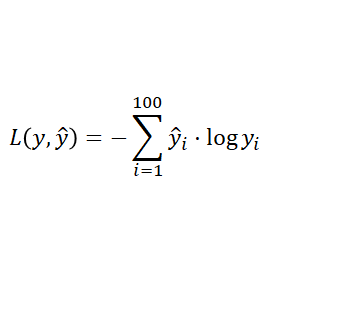

Yi hat is a target output which will always between 0 and 1 .
Yi is the actual output.
And in sigmoid function we have output between 0 and 1 . This equation will run for every 100 samples and then calculate the error and update the weights. From back propagation algorithm- we will run samples in batches and after every batch we will calculate the error and then update the weights.This is the weight updation formula. Here tensorflow calculate everything for us.


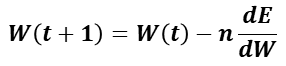

We keep on running this for 6000 times and every time we calculate the weight, we also calculate what is the loss. Now we are outside the inner loop
